# Disruptive Architectures: IoT, IoB & Generative AI → Sprint 3

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pickle

%matplotlib inline

# 1. Criação do DataFrame com Dados Fictícios

In [ ]:
data = {
  "tipo_plano": [
    "Premium", "Básico", "Básico", "Premium", "Básico", "Premium", "Premium", "Básico", "Básico", "Premium",
    "Básico", "Premium", "Básico", "Básico", "Premium", "Premium", "Básico", "Premium", "Básico", "Premium",
    "Premium", "Básico", "Básico", "Premium", "Básico", "Premium", "Premium", "Básico", "Básico", "Premium",
    "Básico", "Premium", "Básico", "Básico", "Premium", "Premium", "Básico", "Premium", "Básico", "Premium",
    "Premium", "Básico", "Básico", "Premium", "Básico", "Premium", "Premium", "Básico", "Básico", "Premium",
    "Básico", "Premium", "Básico", "Básico", "Premium", "Premium", "Básico", "Premium", "Básico", "Premium"
  ],
  "valor_mensal": [
    100.0, 250.0, 250.0, 100.0, 100.0, 250.0, 250.0, 100.0, 100.0, 250.0,
    100.0, 250.0, 100.0, 100.0, 250.0, 250.0, 100.0, 250.0, 100.0, 250.0,
    100.0, 250.0, 250.0, 100.0, 100.0, 250.0, 250.0, 100.0, 100.0, 250.0,
    100.0, 250.0, 100.0, 100.0, 250.0, 250.0, 100.0, 250.0, 100.0, 250.0,
    100.0, 250.0, 250.0, 100.0, 100.0, 250.0, 250.0, 100.0, 100.0, 250.0,
    100.0, 250.0, 100.0, 100.0, 250.0, 250.0, 100.0, 250.0, 100.0, 250.0
  ],
  "idade": [
    25, 45, 32, 28, 50, 40, 37, 29, 55, 30,
    60, 35, 40, 38, 45, 42, 27, 36, 52, 39,
    25, 45, 32, 28, 50, 40, 37, 29, 55, 30,
    60, 35, 40, 38, 45, 42, 27, 36, 52, 39,
    25, 45, 32, 28, 50, 40, 37, 29, 55, 30,
    60, 35, 40, 38, 45, 42, 27, 36, 52, 39
  ],
  "num_sinistros": [
    0, 3, 2, 0, 4, 1, 0, 3, 5, 2,
    4, 1, 3, 0, 2, 4, 1, 0, 4, 1,
    0, 3, 2, 0, 4, 1, 0, 3, 5, 2,
    4, 1, 3, 0, 2, 4, 1, 0, 4, 1,
    0, 3, 2, 0, 4, 1, 0, 3, 5, 2,
    4, 1, 3, 0, 2, 4, 1, 0, 4, 1
  ],
  "valor_total_sinistros": [
    0.0, 1200.0, 800.0, 0.0, 1600.0, 500.0, 0.0, 900.0, 2000.0, 700.0,
    1800.0, 400.0, 1500.0, 0.0, 800.0, 1600.0, 300.0, 0.0, 1700.0, 450.0,
    0.0, 1200.0, 800.0, 0.0, 1600.0, 500.0, 0.0, 900.0, 2000.0, 700.0,
    1800.0, 400.0, 1500.0, 0.0, 800.0, 1600.0, 300.0, 0.0, 1700.0, 450.0,
    0.0, 1200.0, 800.0, 0.0, 1600.0, 500.0, 0.0, 900.0, 2000.0, 700.0,
    1800.0, 400.0, 1500.0, 0.0, 800.0, 1600.0, 300.0, 0.0, 1700.0, 450.0
  ],
  "num_consultas": [
    2, 5, 3, 1, 6, 2, 4, 5, 6, 3,
    6, 3, 4, 2, 5, 6, 2, 4, 6, 3,
    2, 5, 3, 1, 6, 2, 4, 5, 6, 3,
    6, 3, 4, 2, 5, 6, 2, 4, 6, 3,
    2, 5, 3, 1, 6, 2, 4, 5, 6, 3,
    6, 3, 4, 2, 5, 6, 2, 4, 6, 3
  ],
  "num_exames": [
    1, 4, 2, 1, 5, 3, 2, 3, 5, 2,
    5, 3, 4, 2, 3, 5, 2, 2, 5, 3,
    1, 4, 2, 1, 5, 3, 2, 3, 5, 2,
    5, 3, 4, 2, 3, 5, 2, 2, 5, 3,
    1, 4, 2, 1, 5, 3, 2, 3, 5, 2,
    5, 3, 4, 2, 3, 5, 2, 2, 5, 3
  ],
  "ranking": [
    "S", "F", "E", "S", "F", "D", "B", "E", "F", "D",
    "F", "C", "E", "B", "D", "F", "C", "A", "F", "C",
    "S", "F", "E", "S", "F", "D", "B", "E", "F", "D",
    "F", "C", "E", "B", "D", "F", "C", "A", "F", "C",
    "S", "F", "E", "S", "F", "D", "B", "E", "F", "D",
    "F", "C", "E", "B", "D", "F", "C", "A", "F", "C"
  ]
}

In [ ]:
# Criando o DataFrame
df = pd.DataFrame(data)

## 2. Transformação dos Dados

Utilizamos o LabelEncoder para transformar uma variável "String" em numérica!
A variável `tipo_plano` será convertida para que o modelo de machine learning consiga processá-la.

In [ ]:
# Convertendo variáveis categóricas em números
label_encoder = LabelEncoder()
df['tipo_plano'] = label_encoder.fit_transform(df['tipo_plano'])
df['ranking'] = label_encoder.fit_transform(df['ranking'])

In [ ]:
# Separando as variáveis de entrada (X) e a variável alvo (y)
X = df[['tipo_plano', 'valor_mensal', 'idade', 'num_sinistros', 'valor_total_sinistros', 'num_consultas', 'num_exames']]
y = df['ranking']

## 3. Treinamento e teste do modelo

Dividimos os dados em conjuntos de treino e teste e treinamos o modelo `RandomForestClassifier` do Scikit-Learn.
Este modelo é adequado para classificação e irá nos permitir uma boa performance na previsão dos rankings de risco.

In [ ]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
# Utilizando um modelo de Random Forest para classificação
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 4. Avaliação do Modelo

Agora, vamos avaliar o desempenho do modelo com os dados de teste.

Isso permite verificar se o modelo está fazendo previsões adequadas para os rankings de risco de novos beneficiários.

In [ ]:
# Realizando predições e avaliando o modelo
y_pred = model.predict(X_test)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



### Matriz de Confusão

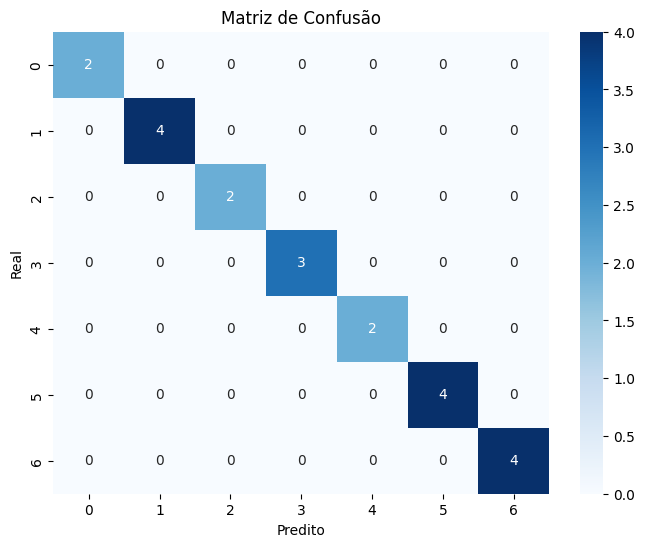

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(df['ranking'].unique()),
            yticklabels=sorted(df['ranking'].unique()))
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

### Importância das Features

<ipython-input-10-e021e0d0d5a8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


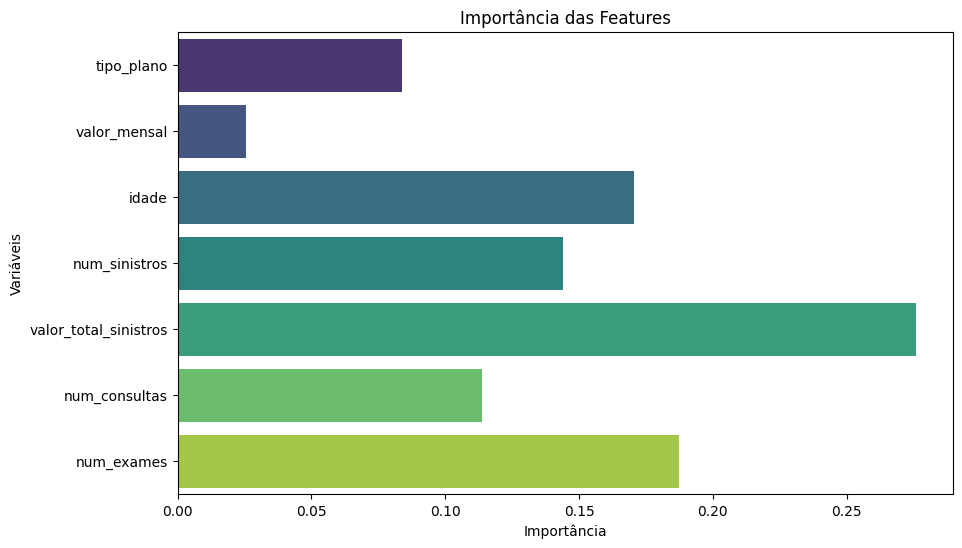

In [ ]:
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Importância das Features")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.show()

## Exemplos de Predição para Novos Beneficiários

Vamos agora simular dois novos beneficiário (um de baixo e outro de alto risco) com características diferentes,
como idade e número de sinistros, para predizer seu ranking de risco.

In [ ]:
# Exemplo de nova entrada para prever o ranking de um usuário de alto risco
beneficiario_alto_risco = [[1, 100.00, 65, 5, 1700.00, 8, 10]]  # Exemplo fictício
ranking_predito = model.predict(beneficiario_alto_risco)
print("Ranking previsto para o novo beneficiário:", label_encoder.inverse_transform(ranking_predito))

Ranking previsto para o novo beneficiário: ['F']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Funcionou! O beneficiário de **ALTO** risco foi classificado como "F" pelo nosso modelo de predição! 😀

In [ ]:
# Exemplo de nova entrada para prever o ranking de um usuário de baixo risco
beneficiario_baixo_risco = [[2, 250.00, 15, 0, 0.00, 1, 1]]  # Exemplo fictício
ranking_predito = model.predict(beneficiario_baixo_risco)
print("Ranking previsto para o novo beneficiário:", label_encoder.inverse_transform(ranking_predito))

Ranking previsto para o novo beneficiário: ['S']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Também funcionou! O beneficiário de **BAIXO** risco foi classificado como "S" pelo nosso modelo de predição! 😀

Para finalizar, vamos tentar prever um usuário de **MÉDIO RISCO**:

In [ ]:
# Exemplo de nova entrada para prever o ranking de um usuário de médio risco
beneficiario_medio_risco = [[2, 100.00, 27, 2, 450.00, 2, 2]]  # Exemplo fictício
ranking_predito = model.predict(beneficiario_medio_risco)
print("Ranking previsto para o novo beneficiário:", label_encoder.inverse_transform(ranking_predito))

Ranking previsto para o novo beneficiário: ['C']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Tudo certo! Ele conseguiu prever corretamente os 3 tipos de entrada! 😊

## Salvando o Modelo e o Encoder para Integração via API

In [ ]:
with open("modelo.pkl", "wb") as f:
    pickle.dump(model, f)
with open("encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)


# Exemplo de Código para API com Flask (NÃO EXECUTÁVEL NO NOTEBOOK):


In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import pickle

app = Flask(__name__)

# Carregar o modelo e o encoder salvos
model = pickle.load(open("modelo.pkl", "rb"))
encoder = pickle.load(open("encoder.pkl", "rb"))

@app.route('/predict', methods=['POST'])
def predict():
    # Espera um JSON com as chaves: tipo_plano, valor_mensal, idade, num_sinistros,
    # valor_total_sinistros, num_consultas, num_exames
    data = request.get_json(force=True)
    df_input = pd.DataFrame([data])
    # Converter 'tipo_plano' utilizando o encoder
    df_input['tipo_plano'] = encoder.transform(df_input['tipo_plano'])
    prediction = model.predict(df_input)
    ranking = encoder.inverse_transform(prediction)
    return jsonify({"ranking": ranking[0]})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
